In [0]:
base_dir = '/content/drive/My Drive/Neural/Leaf'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training apple_scab pictures
train_scab_dir = os.path.join(train_dir, 'Apple___Apple_scab')

# Directory with our training apple_healthy pictures
train_healthy_dir = os.path.join(train_dir, 'Apple___healthy')

# Directory with our validation apple_scab pictures
validation_scab_dir = os.path.join(validation_dir, 'Apple___Apple_scab')

# Directory with our validation apple_healthy pictures
validation_healthy_dir = os.path.join(validation_dir, 'Apple___healthy')

In [10]:
!pwd

/content/drive/My Drive/Neural


In [12]:
train_scab_fnames = os.listdir(train_scab_dir)
print (train_scab_fnames[:10])

train_healthy_fnames = os.listdir(train_healthy_dir)
train_healthy_fnames.sort()
print (train_healthy_fnames[:10])

['00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_final_masked.jpg', '029424b0-0ef5-491b-9ef5-069190d24d8f___FREC_Scab 3504_final_masked.jpg', '0261a6e4-21f8-481a-8827-b674e6955644___FREC_Scab 3055_final_masked.jpg', '0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037_final_masked.jpg', '01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_final_masked.jpg', '03354abb-aa1c-4f9d-a1ef-9f40505cd539___FREC_Scab 3355_final_masked.jpg', '023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487_final_masked.jpg', '0395b847-2c73-4674-826f-33a6afb5b4fe___FREC_Scab 3287_final_masked.jpg', '0340dc35-5215-48ab-8db7-06af99fcb358___FREC_Scab 2966_final_masked.jpg', '01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_final_masked.jpg']
['0055dd26-23a7-4415-ac61-e0b44ebfaf80___RS_HL 5672_final_masked.jpg', '00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709_final_masked.jpg', '0098dbd9-286a-4d6a-bf4b-5459d66f88c0___RS_HL 5776_final_masked.jpg', '00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL 76

In [13]:
print ('total training scab images:', len(os.listdir(train_scab_dir)))
print ('total training healthy images:', len(os.listdir(train_healthy_dir)))
print ('total validation scab images:', len(os.listdir(validation_scab_dir)))
print ('total validation healthy images:', len(os.listdir(validation_healthy_dir)))

total training scab images: 455
total training healthy images: 1000
total validation scab images: 115
total validation healthy images: 250


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

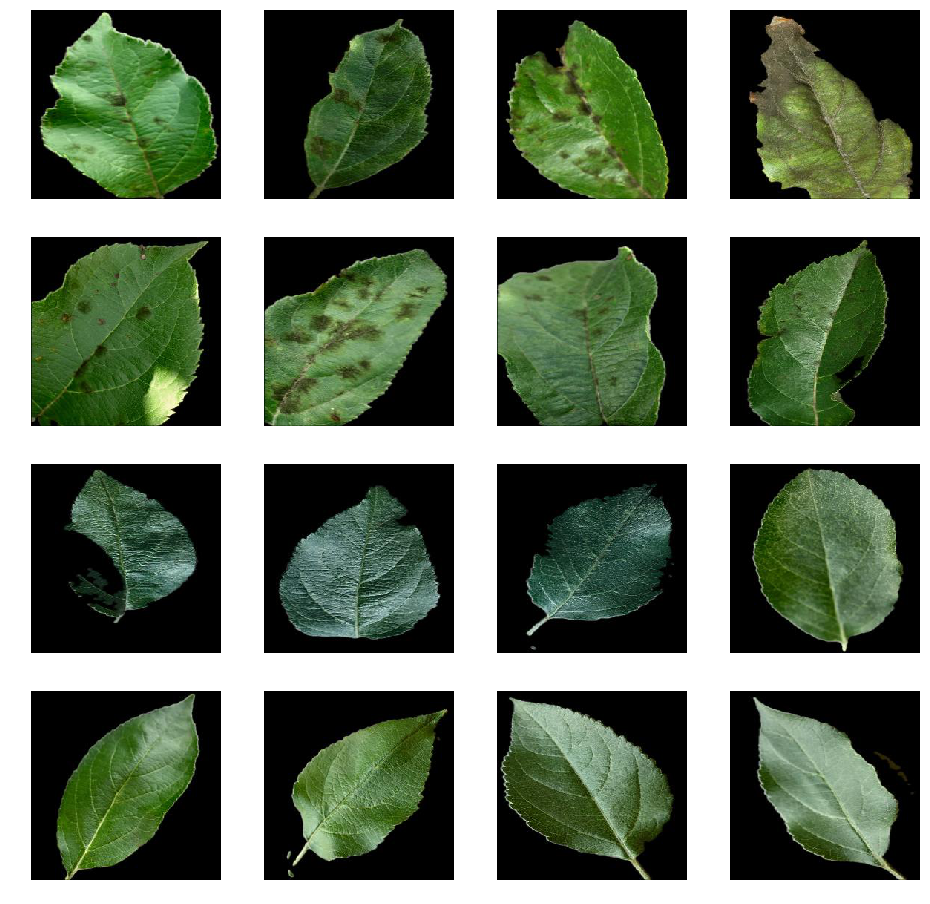

In [15]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_scab_pix = [os.path.join(train_scab_dir, fname) 
                for fname in train_scab_fnames[pic_index-8:pic_index]]
next_healthy_pix = [os.path.join(train_healthy_dir, fname) 
                for fname in train_healthy_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_scab_pix+next_healthy_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [17]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 1455 images belonging to 2 classes.
Found 365 images belonging to 2 classes.


In [23]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=291,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=73,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
19/19 [==============================] - 176s 9s/step - loss: 0.1981 - acc: 0.9123
 - 715s - loss: 0.4094 - acc: 0.8041 - val_loss: 0.1981 - val_acc: 0.9123
Epoch 2/15
19/19 [==============================] - 2s 92ms/step - loss: 0.1774 - acc: 0.9260
 - 7s - loss: 0.2668 - acc: 0.8838 - val_loss: 0.1774 - val_acc: 0.9260
Epoch 3/15
19/19 [==============================] - 2s 92ms/step - loss: 0.1721 - acc: 0.9342
 - 7s - loss: 0.2256 - acc: 0.9148 - val_loss: 0.1721 - val_acc: 0.9342
Epoch 4/15
19/19 [==============================] - 2s 91ms/step - loss: 0.2730 - acc: 0.8877
 - 7s - loss: 0.1780 - acc: 0.9306 - val_loss: 0.2730 - val_acc: 0.8877
Epoch 5/15
19/19 [==============================] - 2s 91ms/step - loss: 0.1659 - acc: 0.9288
 - 7s - loss: 0.1581 - acc: 0.9402 - val_loss: 0.1659 - val_acc: 0.9288
Epoch 6/15
19/19 [==============================] - 2s 92ms/step - loss: 0.2584 - acc: 0.9014
 - 7s - loss: 0.1218 - acc: 0.9567 - val_loss: 0.2584 - val_acc: 0.9014
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


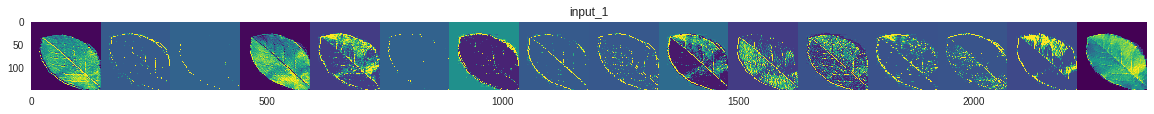

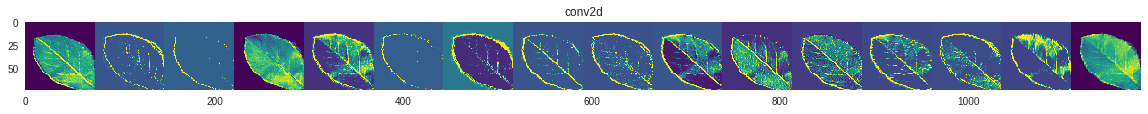

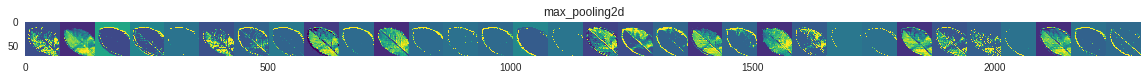

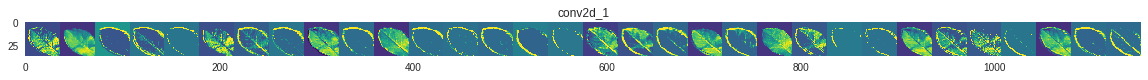

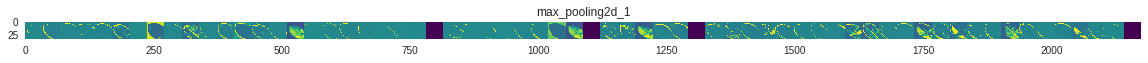

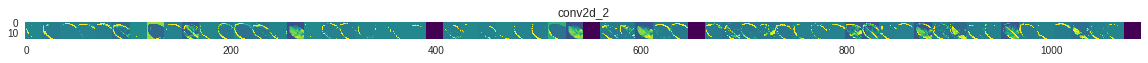

In [25]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
scab_img_files = [os.path.join(train_scab_dir, f) for f in train_scab_fnames]
healthy_img_files = [os.path.join(train_healthy_dir, f) for f in train_healthy_fnames]
img_path = random.choice(scab_img_files + healthy_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

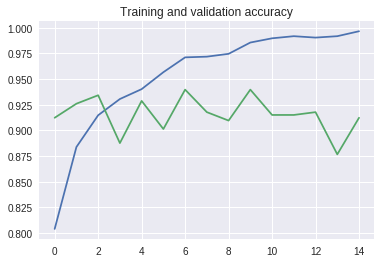

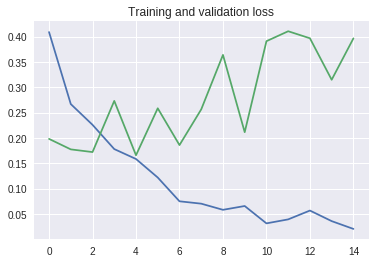

In [26]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')